In [1]:
from fast_ml.utilities import reduce_memory_usage
import pandas as pd
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta 
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='Malgun Gothic')
# import pandas_profiling

CLICKS DATASET FILE DESCRIPTION
================================================================================
아이템을 클릭했을 때 발생하는 로그  
-Session ID : 사용자 세션 [중복허용]  
-Timestamp : 아이템 클릭 시간  
-Item ID : 클릭된 아이템 ID  
-Category – 클릭된 아이템 카테고리  
"S" : special offer (프로모션, 특별 주문)  
"0" : missing value,   
"예) 1 ~ 12" : 제품 카테고리  

BUYS DATSET FILE DESCRIPTION
================================================================================
유저가 아이템을 구매했을 때 발생하는 로그  
-Session ID : 사용자 세션 [중복허용]  
-Timestamp : 아이템 구매 시간  
-Item ID – 구매한 아이템 ID  
-Price – 아이템 가격  
-Quantity – 구매 수량  

TEST DATASET FILE DESCRIPTION
================================================================================
The file yoochoose-test.dat comprising only clicks of users over items.  
This file served as a test file in the RecSys challenge 2015.   
The structure is identical to the file yoochoose-clicks.dat but you will not find the  
corresponding buying events to these sessions in the yoochoose-buys.dat file.  

In [2]:
# buy_df = pd.read_csv("./dataset\yoochoose-buys.dat", 
#                      names=["session", "timestamp", "item", "price", "qty"],
#                      parse_dates=["timestamp"]
#                     )
# buy_df = buy_df.sort_values(by=["timestamp", "session"])
# buy_df = buy_df.reset_index(drop=True)

# click_df = pd.read_csv("./dataset\yoochoose-clicks.dat",
#                      names=["session", "timestamp", "item", "category"],
#                      parse_dates=["timestamp"],
#                      converters={"category": lambda c: -1 if c == "S" else c})
# click_df = click_df.sort_values(by=["timestamp", "session"])
# click_df = click_df.reset_index(drop=True)

buy_df = pd.read_csv("./dataset\yoochoose-buys.csv")
click_df = pd.read_csv("./dataset/yoochoose-clicks.csv")

buy_df[['session','item','price','qty']] = reduce_memory_usage(buy_df[['session','item','price','qty']], convert_to_category = False) # 데이터 프레임 메모리 사용 공간을 줄여줌
click_df[['session','item','category']] = reduce_memory_usage(click_df[['session','item','category']], convert_to_category = False) # 데이터 프레임 메모리 사용 공간을 줄여줌

In [3]:
test_df = pd.read_csv("./dataset\yoochoose-test.dat",names=["session", "timestamp", "item", "category"],
                     parse_dates=["timestamp"])

E:\tool\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
# buy_df.to_csv("./dataset\yoochoose-buys.csv",index=False,encoding='utf-8-sig')
# click_df.to_csv("./dataset/yoochoose-clicks.csv",index=False,encoding='utf-8-sig')

In [13]:
print("[buy]")
print(f"shape : {buy_df.shape}")
print(f"전체 데이터 수 : {buy_df.shape[0]} / 사용자 수 : {buy_df.session.unique().shape[0]}")
buy_df.head()

[buy]
shape : (1150753, 5)
전체 데이터 수 : 1150753 / 사용자 수 : 509696


,session,timestamp,item,price,qty
0,263073,2014-04-01 03:05:31.743000+00:00,214716982,2617,1
1,466654,2014-04-01 03:21:30.255000+00:00,214820812,313,1
2,466654,2014-04-01 03:21:30.271000+00:00,214584907,4711,1
3,185089,2014-04-01 03:29:09.230000+00:00,214819376,418,1
4,185089,2014-04-01 03:29:09.280000+00:00,214819430,418,1


In [ ]:
click_df = pd.read_csv("./dataset\yoochoose-clicks.dat",
                     names=["session", "timestamp", "item", "category"],
                     parse_dates=["timestamp"],
                     converters={"category": lambda c: -1 if c == "S" else c})
click_df = click_df.sort_values(by=["timestamp", "session"])
click_df = buy_df.reset_index(drop=True)

In [ ]:
print("[clcik]")
print(f"shape : {click_df.shape}")
print(f"[click]\n전체 데이터 수 : {click_df.shape[0]} / 사용자 수 : {click_df.session.unique().shape[0]}")
click_df.head()

In [11]:
print("[test]")
print(f"shape : {test_df.shape}")
print(f"[test]\n전체 데이터 수 : {test_df.shape[0]} / 사용자 수 : {test_df.session.unique().shape[0]}")
test_df.head()

[test]
shape : (8251791, 4)
[test]
전체 데이터 수 : 8251791 / 사용자 수 : 2312432


,session,timestamp,item,category
0,5,2014-04-07 17:13:46.713000+00:00,214530776,0
1,5,2014-04-07 17:20:56.973000+00:00,214530776,0
2,5,2014-04-07 17:21:19.602000+00:00,214530776,0
3,10,2014-04-04 07:44:14.590000+00:00,214820942,0
4,10,2014-04-04 07:45:20.245000+00:00,214826810,0


In [101]:
# 2014/04/01 ~ 2014/09/30
print("[데이터 시간 분포]")
print(buy_df.timestamp.min(), buy_df.timestamp.max())
print(click_df.timestamp.min(), click_df.timestamp.max())
print(test_df.timestamp.min(), test_df.timestamp.max())

[데이터 시간 분포]
2014-04-01 03:05:31.743000+00:00 2014-09-30 02:35:12.859000+00:00
2014-04-01 03:00:00.124000+00:00 2014-09-30 02:59:59.430000+00:00
2014-04-01 03:00:08.250000+00:00 2014-09-30 02:59:23.866000+00:00


In [103]:
print(f"[buy, test 중복 확인]")
print(f"[Item]\nbuy item 갯수 : {buy_df.item.unique().shape[0]}\ntest item 갯수 : {test_df.item.unique().shape[0]}\n중복 아이템 갯수 : {len(set(buy_df.item) & set(test_df.item))}")
print(f"[SESSION]\nbuy 사용자 수 : {buy_df.session.unique().shape[0]}\ntest 사용자 수 : {test_df.session.unique().shape[0]}\n중복 사용자 수 : {len(set(buy_df.session) & set(test_df.session))}")

[buy, test 중복 확인]
[Item]
buy item 갯수 : 19949
test item 갯수 : 42155
중복 아이템 갯수 : 19485
[SESSION]
buy 사용자 수 : 509696
test 사용자 수 : 2312432
중복 사용자 수 : 0


In [104]:
print(f"[click, test 중복 확인]")
print(f"[Item]\nclick item 갯수 : {click_df.item.unique().shape[0]}\ntest item 갯수 : {test_df.item.unique().shape[0]}\n중복 아이템 갯수 : {len(set(click_df.item) & set(test_df.item))}")
print(f"[SESSION]\nclick 사용자 수 : {click_df.session.unique().shape[0]}\ntest 사용자 수 : {test_df.session.unique().shape[0]}\n중복 사용자 수 : {len(set(click_df.session) & set(test_df.session))}")

[click, test 중복 확인]
[Item]
click item 갯수 : 52739
test item 갯수 : 42155
중복 아이템 갯수 : 40607
[SESSION]
click 사용자 수 : 9249729
test 사용자 수 : 2312432
중복 사용자 수 : 0


In [104]:
print(f"[click, test 중복 확인]")
print(f"[Item]\nclick item 갯수 : {click_df.item.unique().shape[0]}\ntest item 갯수 : {test_df.item.unique().shape[0]}\n중복 아이템 갯수 : {len(set(click_df.item) & set(test_df.item))}")
print(f"[SESSION]\nclick 사용자 수 : {click_df.session.unique().shape[0]}\ntest 사용자 수 : {test_df.session.unique().shape[0]}\n중복 사용자 수 : {len(set(click_df.session) & set(test_df.session))}")

[click, test 중복 확인]
[Item]
click item 갯수 : 52739
test item 갯수 : 42155
중복 아이템 갯수 : 40607
[SESSION]
click 사용자 수 : 9249729
test 사용자 수 : 2312432
중복 사용자 수 : 0


In [106]:
print(f"[buy, click, test 중복 확인]")
print(f"[Item]\n중복 아이템 갯수 : {len(set(buy_df.item) & set(click_df.item) & set(test_df.item))}")
print(f"[SESSION]\n중복 사용자 수 : {len(set(buy_df.session) & set(click_df.session) & set(test_df.session))}")

[buy, click, test 중복 확인]
[Item]
중복 아이템 갯수 : 19485
[SESSION]
중복 사용자 수 : 0


In [5]:
click_df.loc[click_df['item']==214716982]

,session,timestamp,item,price,qty
0,263073,2014-04-01 03:05:31.743000+00:00,214716982,2617,1
44,324737,2014-04-01 04:29:24.164000+00:00,214716982,2303,1
45,324737,2014-04-01 04:29:24.173000+00:00,214716982,2617,1
76,129948,2014-04-01 05:04:49.947000+00:00,214716982,2617,2
101,262096,2014-04-01 05:25:22.684000+00:00,214716982,1883,1
...,...,...,...,...,...
1131473,11339002,2014-09-25 07:20:17.822000+00:00,214716982,2303,2
1131865,11272489,2014-09-25 08:04:45.600000+00:00,214716982,3141,4
1134513,11423583,2014-09-25 13:39:26.073000+00:00,214716982,2093,2
1135710,11399089,2014-09-25 16:43:41.332000+00:00,214716982,3455,2


# 논문 분석 검증

## 시간에 따른 구매율 변화량
We define a buying rate as the fraction of buyer sessions in some subset of sessions  
해당 날에 기록된 모든 세션 중 실제 구매를 한 세션 비율

In [177]:
# 일자별 구매수
buy_df['date'] = buy_df.timestamp.astype('str').apply(lambda x: x.split(" ")[0]).apply(lambda x:x.split('2014-')[1])
buy_cnt_per_day = {}
for date, sessions in buy_df.groupby('date').session:
    buy_cnt_per_day[date] = len(sessions.unique()) # 해당일에 구매한 세션 수
    
date_buy_df = pd.DataFrame.from_dict(buy_cnt_per_day,orient='index').reset_index()
date_buy_df.columns = ['date','buy_count']

In [109]:
# 일자별 클릭수
click_df['date'] = click_df.timestamp.astype('str').apply(lambda x: x.split(" ")[0]).apply(lambda x:x.split('2014-')[1])
click_cnt_per_day = {}
for date, sessions in click_df.groupby('date').session:
    click_cnt_per_day[date] = len(sessions.unique()) # 해당일에 구매한 세션 수
    
date_click_df = pd.DataFrame.from_dict(click_cnt_per_day,orient='index').reset_index()
date_click_df.columns = ['date','click_count']

In [196]:
# 일자별 구매율
click_buy_df.date = click_buy_df.date.apply(lambda x: x.replace("-","/"))
click_buy_df_per_date = pd.merge(date_buy_df,date_click_df)
click_buy_df_per_date['buy_rate'] = click_buy_df.buy_count / click_buy_df.click_count

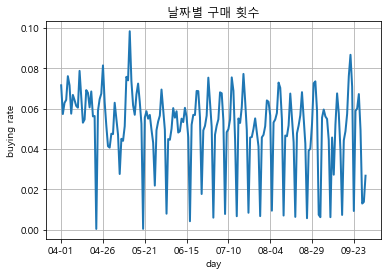

In [197]:
ax = click_buy_df_per_date.plot(x='date',y='buy_rate',legend=None,title="날짜별 구매 횟수", grid=True, linewidth=2)
ax.set_xlabel("day")
ax.set_ylabel("buying rate")
plt.show()

### 논문에서 소개한 그래프와 일치

### 논문과 그래프가 일치하지 않음

In [27]:
# 시간대별 구매수
buy_df['hour'] = buy_df.timestamp.apply(lambda x:x.hour)
buy_cnt_per_hour = {}
for hour, sessions in buy_df.groupby('hour').session:
    buy_cnt_per_hour[hour] = len(sessions.unique()) # 해당시간에 구매한 세션 수
    
hour_buy_df = pd.DataFrame.from_dict(buy_cnt_per_hour,orient='index').reset_index()
hour_buy_df.columns = ['hour','buy_count']

In [28]:
# 시간대별 클릭수
click_df['hour'] = click_df.timestamp.apply(lambda x:x.hour)
click_cnt_per_hour = {}
for hour, sessions in click_df.groupby('hour').session:
    click_cnt_per_hour[hour] = len(sessions.unique()) # 해당일에 구매한 세션 수
    
hour_click_df = pd.DataFrame.from_dict(click_cnt_per_hour,orient='index').reset_index()
hour_click_df.columns = ['hour','click_count']

In [29]:
# 시간대별 구매율
click_buy_per_hour = pd.merge(hour_buy_df,hour_click_df)
click_buy_per_hour['buy_rate'] = click_buy_per_hour.buy_count / click_buy_per_hour.click_count

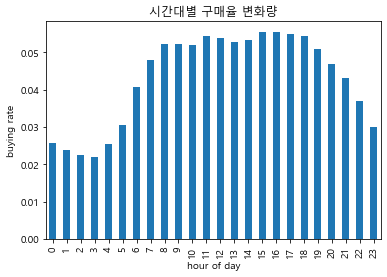

In [30]:
ax = click_buy_per_hour.plot.bar(x='hour',y='buy_rate',legend=None,title="시간대별 구매율 변화량")
ax.set_xlabel("hour of day")
ax.set_ylabel("buying rate")
plt.show()

### 시간대별 구매율 (개인 추가)

In [33]:
# 시간대별 클릭률
click_buy_per_hour['click_rate'] = click_buy_per_hour.click_count / sum(click_buy_per_hour.click_count)

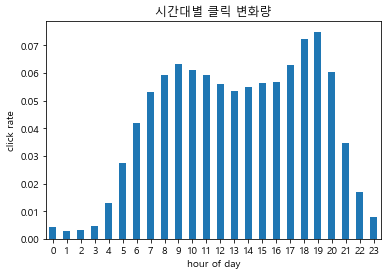

In [36]:
ax = click_buy_per_hour.plot.bar(x='hour',y='click_rate',legend=None,title="시간대별 클릭 변화량", rot=0)
ax.set_xlabel("hour of day")
ax.set_ylabel("click rate")
plt.show()
## 논문에서 소개된 시간대별 구매율과 동일하게 시가낻별 클릭율도 구매율과 유사한 경향을 나타냄을 알 수 있음

## 요일별 구매율 변화량

In [3]:
# click_df['weekday'] = click_df.timestamp.apply(datetime.weekday)

In [6]:
# buy_df['weekday'] = buy_df.timestamp.apply(datetime.weekday)

In [8]:
# 요일별 구매수
# buy_df['weekday'] = buy_df.timestamp.apply(datetime.weekday)
buy_cnt_per_weekday = {}
for weekday, sessions in buy_df.groupby('weekday').session:
    buy_cnt_per_weekday[weekday] = len(sessions.unique()) # 해당일에 구매한 세션 수
    
weekday_buy_df = pd.DataFrame.from_dict(buy_cnt_per_weekday,orient='index').reset_index()
weekday_buy_df.columns = ['weekday','buy_count']

In [10]:
# 요일별 클릭수
# click_df['weekday'] = click_df.timestamp.apply(datetime.weekday)
click_cnt_per_weekday = {}
for weekday, sessions in click_df.groupby('weekday').session:
    click_cnt_per_weekday[weekday] = len(sessions.unique()) # 해당일에 구매한 세션 수
    
weekday_click_df = pd.DataFrame.from_dict(click_cnt_per_weekday,orient='index').reset_index()
weekday_click_df.columns = ['weekday','click_count']

In [16]:
# 요일별 구매율
click_buy_per_weekday = pd.merge(weekday_buy_df,weekday_click_df)
click_buy_per_weekday['buy_rate'] = click_buy_per_weekday.buy_count / click_buy_per_weekday.click_count

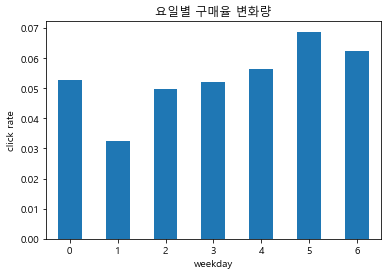

In [18]:
ax = click_buy_per_weekday.plot.bar(x='weekday',y='buy_rate',legend=None,title="요일별 구매율 변화량", rot=0)
ax.set_xlabel("weekday")
ax.set_ylabel("click rate")
plt.show()
# 논문과 동일

## 클릭수에 따른 구매율 변화량
- buying rate 계산법이 다를것으로 추정, y축 값이 타 그래프 대비 높아서 click 당 구매여부로 가야할 듯

### 각 세션당 클릭수 및 구매율

In [30]:
session_click_cnt = click_df.groupby('session').item.count().to_dict()
session_buy_cnt = buy_df.groupby('session').item.count().to_dict()
session_buy_rate = {}

for session, click_count in tqdm(session_click_cnt.items()):
    try:
        if (session_buy_cnt[session] != 0):
            session_buy_rate[session] = True
        else:
            session_buy_rate[session] = False
    except:
        session_buy_rate[session] = False

100%|█████████████████████████████████████████| 9249729/9249729 [00:07<00:00, 1203029.59it/s]


In [31]:
session_click_buy_rate = []
for session, click_cnt in tqdm(session_click_cnt.items()):
    temp = [click_cnt,session_buy_rate[session]]
    session_click_buy_rate.append(temp)

100%|██████████████████████████████████████████| 9249729/9249729 [00:09<00:00, 955225.18it/s]


In [32]:
click_buy_per_session = pd.DataFrame(session_click_buy_rate,columns=['click','buy'])

In [46]:
click_cnt_buy_rate = {}
for click, g in tqdm(click_buy_per_session.groupby('click')):
    try:
        click_cnt_buy_rate[click] = g.buy.value_counts()[True] / g.buy.count()
    except:
        click_cnt_buy_rate[click] = 0

100%|█████████████████████████████████████████████████████| 188/188 [00:00<00:00, 262.57it/s]


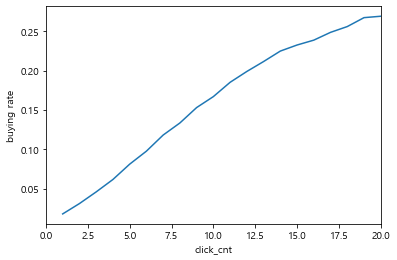

In [82]:
click_cnt_buy_rate_df = pd.DataFrame.from_dict(click_cnt_buy_rate,orient='index').reset_index()
click_cnt_buy_rate_df.columns = ['click_cnt','buy_rate']
ax = click_cnt_buy_rate_df.loc[click_cnt_buy_rate_df.click_cnt <= 20].plot(x='click_cnt',y='buy_rate',legend=None)
ax.set_xlim([0,20])
ax.set_ylabel('buying rate')
plt.show()

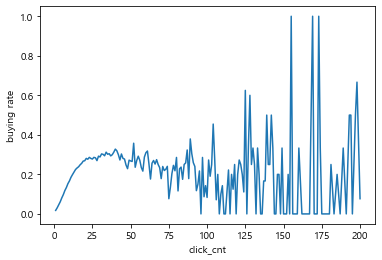

In [83]:
ax = click_cnt_buy_rate_df.plot(x='click_cnt',y='buy_rate',legend=None)
ax.set_ylabel('buying rate')
plt.show()
### 20정도까지는 비례하지만 그 이후부터는 정비례하지 않음

## 최빈 아이템

# 특이사항
기존 로그인으로 탐색을 한 후, 재로그인을 통해 장바구니에 담긴 물건을 일제히 구매하는 상황이 있어 buying rate가 1이상 나오는 경우가 존재

In [28]:
click_df.loc[click_df.session==428198]

,session,timestamp,item,category,weekday
299188,428198,2014-04-02 14:20:37.301000+00:00,214716937,0,2
299293,428198,2014-04-02 14:21:10.754000+00:00,214716937,0,2
299924,428198,2014-04-02 14:24:30.584000+00:00,214716971,0,2
299983,428198,2014-04-02 14:24:45.838000+00:00,214716971,0,2


In [29]:
buy_df.loc[buy_df.session==428198] # 장바구니에 담아두고 한번에 구매한듯

,session,timestamp,item,price,qty,weekday
9018,428198,2014-04-02 14:35:51.073000+00:00,214716937,1360,1,2
9019,428198,2014-04-02 14:35:51.095000+00:00,214716971,2198,2,2
9020,428198,2014-04-02 14:35:51.105000+00:00,214716937,2198,1,2
9021,428198,2014-04-02 14:35:51.134000+00:00,214716971,1988,2,2
9022,428198,2014-04-02 14:35:52.156000+00:00,214716937,2198,1,2
...,...,...,...,...,...,...
9147,428198,2014-04-02 14:42:33.804000+00:00,214716971,2198,2,2
9148,428198,2014-04-02 14:42:34.230000+00:00,214716937,2198,1,2
9149,428198,2014-04-02 14:42:34.236000+00:00,214716937,1360,1,2
9150,428198,2014-04-02 14:42:34.238000+00:00,214716971,1988,2,2
